In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [58]:
# Check for null values
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [59]:
print(df[['height', 'weight', 'ap_hi', 'ap_lo']].describe())

             height        weight         ap_hi         ap_lo
count  70000.000000  70000.000000  70000.000000  70000.000000
mean     164.359229     74.205690    128.817286     96.630414
std        8.210126     14.395757    154.011419    188.472530
min       55.000000     10.000000   -150.000000    -70.000000
25%      159.000000     65.000000    120.000000     80.000000
50%      165.000000     72.000000    120.000000     80.000000
75%      170.000000     82.000000    140.000000     90.000000
max      250.000000    200.000000  16020.000000  11000.000000


In [60]:
# drop unneccessary columns
df.drop(['id'], axis=1, inplace=True)

In [61]:
df.duplicated().sum()

24

In [62]:
df = df.drop_duplicates()

In [63]:
df['age'] = (df['age']/365).astype('int64')
df

<ipython-input-63-ae444afdee48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = (df['age']/365).astype('int64')


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [64]:
# remove extreme outliers
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]

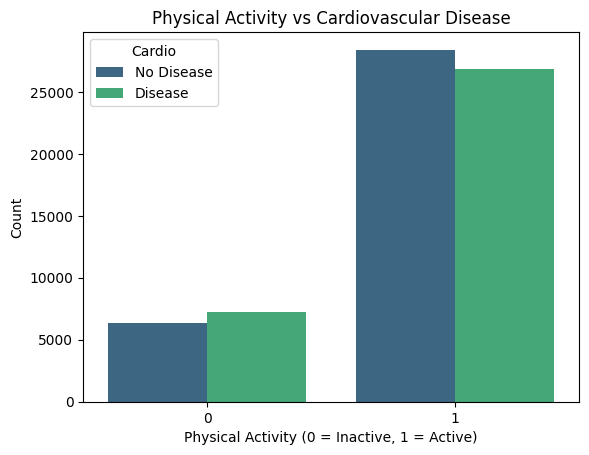

In [65]:
sns.countplot(data=df, x='active', hue='cardio', palette='viridis')
plt.title('Physical Activity vs Cardiovascular Disease')
plt.xlabel('Physical Activity (0 = Inactive, 1 = Active)')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Disease'])
plt.show()


**Inactive People**: Those who are not physically active are more likely to have heart disease.

**Active People**: Being active lowers the risk, and most active people do not have heart disease.

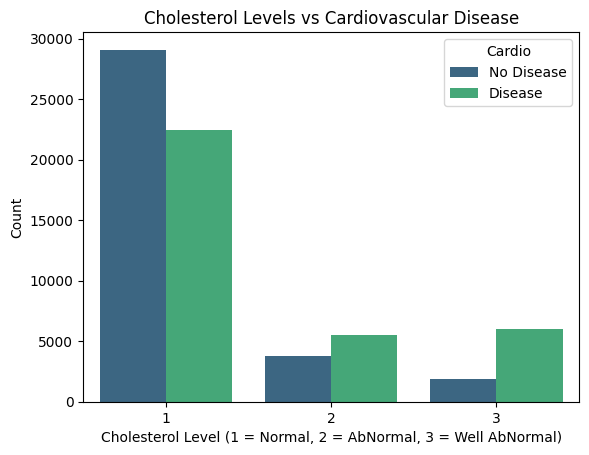

In [66]:
# Cholesterol levels vs. disease
sns.countplot(data=df, x='cholesterol', hue='cardio', palette='viridis')
plt.title('Cholesterol Levels vs Cardiovascular Disease')
plt.xlabel('Cholesterol Level (1 = Normal, 2 = AbNormal, 3 = Well AbNormal)')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Disease'])
plt.show()


**Normal Cholesterol**: People with normal cholesterol levels are more likely to not have heart disease.

**Above Normal Cholesterol**: Slightly high cholesterol increases the chance of having heart disease a bit.

**Well Above Normal Cholesterol**: Very high cholesterol makes heart disease much more likely.


In summary, high cholesterol and inactivity are key risks for heart disease, while normal cholesterol and staying active improve heart health

# Spliting the Data

In [69]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Algorithm

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# initialalize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Evaluate The Model

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7056214093520471
Precision: 0.7024092801903629
Recall: 0.6976366322008862
F1 Score: 0.7000148214021047
